# Simulation of the Monty Hall Problem

In [1]:
import random as rm
import numpy as np
import matplotlib.pyplot as plt

I define a function with three doors, in which two of them are empty and one has a prize. This for three types of players:
- the **switcher**, who choose a door and change it after the presenter open an empty door
- the **conservative**, who mantain the first choice all the game
- the **newcomer**, who choose the first door after the presenter already opened an empty door

In [2]:
def monty_hall(player, reps):
    
    wins = 0
    
    for _ in range(reps):
        
        doors = [0,0,0]
        prize = rm.randint(0,2)
        doors[prize] = 1
        
        choice = rm.randint(0,2)
        
        doors_left = [i for i in range(3) if i != choice and doors[i] == 0]
        opening_door = rm.choice(doors_left)
        
        if player == 'switcher':
            new_choice = [i for i in range(3) if i != choice and i != opening_door][0]
            final_choice = new_choice
        elif player == 'conservative':
            final_choice = choice
        elif player == 'newcomer':
            pick = rm.choice([i for i in range(3) if i != opening_door])
            final_choice = pick
            
        if doors[final_choice] == 1:
            wins += 1
    
    return wins/reps

In [5]:
result_new = monty_hall('newcomer', 100)
print('The probability winning of a newcomer player is ' + str(result_new*100) + '%')
result_swi = monty_hall('switcher', 100)
print('The probability winning of a switcher player is ' + str(result_swi*100) + '%')
result_cons = monty_hall('conservative', 100)
print('The probability winning of a conservative player is ' + str(result_cons*100) + '%')

The probability winning of a newcomer player is 45.0%
The probability winning of a switcher player is 64.0%
The probability winning of a conservative player is 34.0%


The player who has the most probability of winning is the switcher player.

Here i define a function in the case of $N$ doors to choose from and $M <= N - 2$ of them are opened by the presenter.

In [51]:
def monty_hall_NM(player, N, M, reps):
    
    wins = 0
    
    for _ in range(reps):
        
        doors = [0] * N
        prize = rm.randint(0, N-1)
        doors[prize] = 1
        
        choice = rm.randint(0, N-1)
        
        doors_left = [i for i in range(N) if i != choice and doors[i] == 0]
    
        opening_doors = rm.sample(doors_left, M)
        
        if player == 'switcher':
            new_choice = [i for i in range(N) if i != choice and i not in opening_doors]
            final_choice = rm.choice(new_choice)
        elif player == 'conservative':
            final_choice = choice
        elif player == 'newcomer':
            new_choice = [i for i in range(N) if i not in opening_doors]
            final_choice = rm.choice(new_choice)
        
        if doors[final_choice] == 1:
            wins += 1

    return wins/reps


For $N = 100$ and $M = 98$:

In [54]:
result_new = monty_hall_NM('newcomer', 100, 98, 10000)
print(f'The winning probability of a newcomer player is {result_new:.2f}%')
result_swi = monty_hall_NM('switcher', 100, 98, 10000)
print(f'The winning probability of a switcher player is {result_swi:.2f}%')
result_cons = monty_hall_NM('conservative', 100, 98, 10000)
print(f'The winning probability of a conservative player is {result_cons:.2f}%')

The winning probability of a newcomer player is 0.50%
The winning probability of a switcher player is 0.99%
The winning probability of a conservative player is 0.01%


For $N = 200$ and $M = 198$:

In [25]:
result_new = monty_hall_NM('newcomer', 200, 198, 10000)
print(f'The winning probability of a newcomer player is {result_new:.2f}%')
result_swi = monty_hall_NM('switcher', 200, 198, 10000)
print(f'The winning probability of a switcher player is {result_swi:.2f}%')
result_cons = monty_hall_NM('conservative', 200, 198, 10000)
print(f'The winning probability of a conservative player is {result_cons:.2f}%')

The winning probability of a newcomer player is 50.28%
The winning probability of a switcher player is 99.5%
The winning probability of a conservative player is 0.38999999999999996%


In [30]:
player = 'newcomer'
N_lin = np.arange(3, 101, 5)
M_lin = np.arange(1, 99, 5)

results = np.zeros((len(N_lin), len(M_lin)))

for i,N in enumerate(N_lin):
    for j,M in enumerate(M_lin):
        if M <= N-2:
            results[i,j] = monty_hall_NM(player, N, M, 1000)

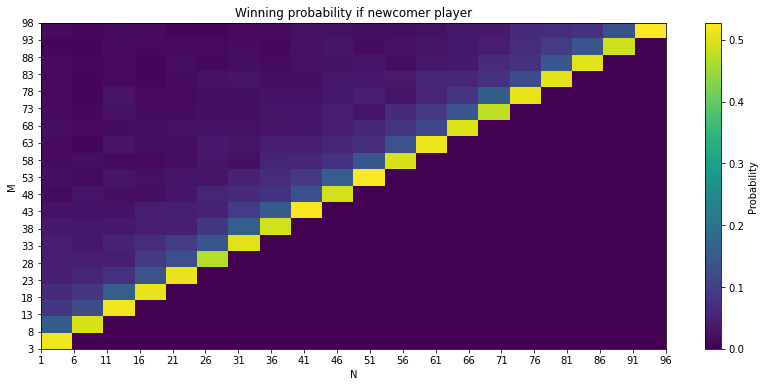

In [44]:
plt.figure(figsize=(14, 6))

plt.plot()
plt.title(f"Winning probability if %s player" % (player))
plt.xlabel("N")
plt.ylabel("M")
plt.imshow(results, origin='lower', aspect='auto', extent=[min(M_lin), max(M_lin), min(N_lin), max(N_lin)], cmap='viridis')
plt.colorbar(label="Probability")
plt.xticks(M_lin)
plt.yticks(N_lin);